In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
# import seaborn as sns

from nltk.stem.snowball import SnowballStemmer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from nltk.corpus import stopwords

from gensim import corpora, models, similarities

%matplotlib inline

In [ ]:
models.

In [3]:
# load train data

In [2]:
df_train = pd.read_csv('data/train.csv', encoding='ISO-8859-1')

In [3]:
df_train = df_train.drop('id', axis=1)

In [54]:
df_train

,product_uid,product_title,search_term,relevance,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...
5,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...
6,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...
7,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...
8,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...
9,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...


In [6]:
# load attribute data for both train and test data

In [4]:
df_attr = pd.read_csv('data/attributes.csv', encoding='ISO-8859-1')

In [8]:
# discard nan rows

In [5]:
df_attr = df_attr[np.isfinite(df_attr['product_uid'])]

In [10]:
# import product description data for both train and test data

In [6]:
df_dsp = pd.read_csv('data/product_descriptions.csv', encoding='ISO-8859-1')

In [12]:
# import test data

In [7]:
df_test = pd.read_csv('data/test.csv', encoding='ISO-8859-1')

In [8]:
id_test = df_test['id']

In [9]:
df_test = df_test.drop('id', axis=1)

In [20]:
# distribution of relevance values in train data

(array([  2.10500000e+03,   3.01000000e+03,   5.00000000e+00,
          6.78900000e+03,   0.00000000e+00,   1.17300000e+04,
          1.60710000e+04,   1.90000000e+01,   1.52130000e+04,
          1.91250000e+04]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

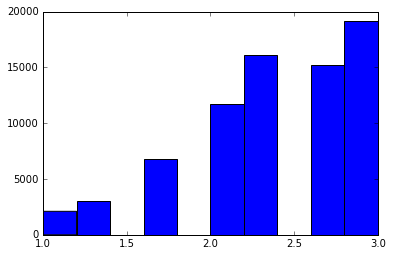

In [10]:
plt.hist(df_train.relevance)

In [22]:
# distribution of search terms length in train data

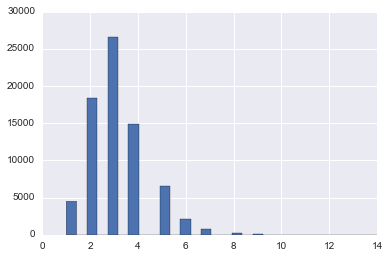

In [23]:
(df_train.search_term.str.count("\\s+") + 1).hist(bins=30)
# \s matches any whitespace character

## Feature Engineering

##### Extract brand info from attribute dataset

In [53]:
df_brand = df_attr[df_attr.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

#### for stemming

In [17]:
stemmer = SnowballStemmer('english')

#### merge peoduct descriprion into train and test data

In [26]:
df_train = pd.merge(df_train, df_dsp, on='product_uid')

In [27]:
df_test = pd.merge(df_test, df_dsp, on='product_uid')

#### group attribute data by product_uid and combine all text for each uid

In [29]:
gb_attr = df_attr.groupby('product_uid')

In [30]:
df_attr_combi = pd.DataFrame()

In [31]:
df_attr_combi['product_uid'] = np.unique(df_attr['product_uid'])

In [32]:
df_attr_combi['attribute'] = [' '.join([str(n) + ' ' + str(v) for (n, v) in zip(
        gb_attr.get_group(uid)['name'],
        gb_attr.get_group(uid)['value'])
        ])for uid in df_attr_combi['product_uid']]

In [57]:
df_attr

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90Â° connectio...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel
5,100001,Bullet06,Galvanized for extra corrosion resistance
6,100001,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001,Gauge,12
8,100001,Material,Galvanized Steel
9,100001,MFG Brand Name,Simpson Strong-Tie


In [33]:
# merge attribute data into train and test data

In [34]:
# combine all text data into one feature -- title + description + attribute

In [35]:
feature_cols = ['product_uid', 'product_title', 'product_description', 
                'search_term']

In [36]:
df_train[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 4 columns):
product_uid            74067 non-null int64
product_title          74067 non-null object
product_description    74067 non-null object
search_term            74067 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [37]:
df_test[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166693 entries, 0 to 166692
Data columns (total 4 columns):
product_uid            166693 non-null int64
product_title          166693 non-null object
product_description    166693 non-null object
search_term            166693 non-null object
dtypes: int64(1), object(3)
memory usage: 6.4+ MB


In [49]:
stoplist = stopwords.words("english")

In [18]:
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [19]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [50]:
def str_stem(s): 
    if isinstance(s, str):
        s = s.lower()
        s = s.replace("'","in.") 
        s = s.replace("inches","in.") 
        s = s.replace("inch","in.")
        s = s.replace(" in ","in. ") 
        s = s.replace(" in.","in.") 

        s = s.replace("''","ft.") 
        s = s.replace(" feet ","ft. ") 
        s = s.replace("feet","ft.") 
        s = s.replace("foot","ft.") 
        s = s.replace(" ft ","ft. ") 
        s = s.replace(" ft.","ft.") 
    
        s = s.replace(" pounds ","lb. ")
        s = s.replace(" pound ","lb. ") 
        s = s.replace("pound","lb.") 
        s = s.replace(" lb ","lb. ") 
        s = s.replace(" lb.","lb.") 
        s = s.replace(" lbs ","lb. ") 
        s = s.replace("lbs.","lb.") 

        s = s.replace(" x "," xby ")
        s = s.replace("*"," xby ")
        s = s.replace(" by "," xby")
        s = s.replace("x0"," xby 0")
        s = s.replace("x1"," xby 1")
        s = s.replace("x2"," xby 2")
        s = s.replace("x3"," xby 3")
        s = s.replace("x4"," xby 4")
        s = s.replace("x5"," xby 5")
        s = s.replace("x6"," xby 6")
        s = s.replace("x7"," xby 7")
        s = s.replace("x8"," xby 8")
        s = s.replace("x9"," xby 9")
        s = s.replace("0x","0 xby ")
        s = s.replace("1x","1 xby ")
        s = s.replace("2x","2 xby ")
        s = s.replace("3x","3 xby ")
        s = s.replace("4x","4 xby ")
        s = s.replace("5x","5 xby ")
        s = s.replace("6x","6 xby ")
        s = s.replace("7x","7 xby ")
        s = s.replace("8x","8 xby ")
        s = s.replace("9x","9 xby ")
    
        s = s.replace(" sq ft","sq.ft. ") 
        s = s.replace("sq ft","sq.ft. ")
        s = s.replace("sqft","sq.ft. ")
        s = s.replace(" sqft ","sq.ft. ") 
        s = s.replace("sq. ft","sq.ft. ") 
        s = s.replace("sq ft.","sq.ft. ") 
        s = s.replace("sq feet","sq.ft. ") 
        s = s.replace("square feet","sq.ft. ") 
    
        s = s.replace(" gallons ","gal. ") 
        s = s.replace(" gallon ","gal. ") 
        s = s.replace("gallons","gal.") 
        s = s.replace("gallon","gal.") 
        s = s.replace(" gal ","gal. ") 
        s = s.replace(" gal","gal.") 

        s = s.replace("ounces","oz.")
        s = s.replace("ounce","oz.")
        s = s.replace(" oz.","oz. ")
        s = s.replace(" oz ","oz. ")

        s = s.replace("centimeters","cm.")    
        s = s.replace(" cm.","cm.")
        s = s.replace(" cm ","cm. ")
        
        s = s.replace("milimeters","mm.")
        s = s.replace(" mm.","mm.")
        s = s.replace(" mm ","mm. ")
        
        s = s.replace("°","deg. ")
        s = s.replace("degrees","deg. ")
        s = s.replace("degree","deg. ")
        
        s = s.replace("volts","volt. ")
        s = s.replace("volt","volt. ")

        s = s.replace("watts","watt. ")
        s = s.replace("watt","watt. ")

        s = s.replace("ampere","amp. ")
        s = s.replace("amps","amp. ")
        s = s.replace(" amp ","amp. ")
        
        s = s.replace("whirpool","whirlpool")
        s = s.replace("whirlpoolga", "whirlpool")
        s = s.replace("whirlpoolstainless","whirlpool stainless")

        s = s.replace("  "," ")
        #s = (" ").join([stemmer.stem(z) for z in s.lower().split(" ")])
        s = (" ").join([stemmer.stem(z) for z in s.split(" ") if word not in stoplist])
        return s.lower()
    else:
        return "null"


In [51]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


In [28]:
class Sim_Text(BaseEstimator, TransformerMixin):
    def _init_(self):
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return gensim.similarities(X.ix[:0],X.ix[:1])

In [627]:
class ItemSelector(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to select subset of data at provided keys 
    
    Parameters
    ----------
    key : list, required
        list-like 
        The key corresponding to the column index of the dataframe.
    '''
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.ix[:, self.key]

In [707]:
class Len_text(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to calculate length of a text
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a dataframe
        new_X = []
        for c in X.columns:
            new_X.append(X[c].str.count('\s')+1)
        return np.array(new_X).reshape(-1, 1)

In [38]:
class Stemm_text(BaseEstimator, TransformerMixin):
    '''
    this transformer is used to extract the stemmers of words in a text
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a dataframe
        new_X = []
        for c in X.columns:
            new_X.append([str_stem(str(s)) for s in X[c]])
        return new_X

In [761]:
class Commen_word(BaseEstimator, TransformerMixin):
    '''
    check how many commen words two texts have
    '''
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # X is a list
        return np.array([str_common_word(a, b) for (a, b) in zip(X[1], X[0])]).reshape(-1, 1) 

In [751]:
df_train[feature_cols].columns

Index(['product_uid', 'product_title', 'search_term', 'product_description',
       'attribute', 'all_text'],
      dtype='object')

In [752]:
feat_union = FeatureUnion(
        transformer_list=[
            ('term_len', Pipeline([
                ('selector', ItemSelector(key=[2])),
                ('text_length', Len_text()),
            ])),
            ('term_in_title', Pipeline([
                ('selector', ItemSelector(key=[1, 2])),
                ('stemm_text', Stemm_text()),
                ('commen_word', Commen_word()),
            ])),
            ('term_in_dsp', Pipeline([
                ('selector', ItemSelector(key=[3, 2])),
                ('stemm_text', Stemm_text()),
                ('commen_word', Commen_word()),
            ])),
            #('term_in_attr', Pipeline([
             #   ('selector', ItemSelector(key=[4, 2])),
              #  ('stemm_text', Stemm_text()),
               # ('commen_word', Commen_word()),
            #])),
           # ('term_in_all', Pipeline([
            #    ('selector', ItemSelector(key=[5, 2])),
             #   ('stemm_text', Stemm_text()),
              #  ('commen_word', Commen_word()),
            #])),
        ],
        n_jobs=5
    )


In [753]:
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

In [754]:
pipeline = Pipeline([
        ('feat_union', feat_union),
        #('model', RandomForestRegressor(n_estimators=100))   
        ('model', clf)
    ])

In [756]:
%time pipeline.fit(df_train[feature_cols], df_train['relevance'].values)

CPU times: user 5.08 s, sys: 1.26 s, total: 6.34 s
Wall time: 3min 31s


Pipeline(steps=[('feat_union', FeatureUnion(n_jobs=5,
       transformer_list=[('term_len', Pipeline(steps=[('selector', ItemSelector(key=[2])), ('text_length', Len_text())])), ('term_in_title', Pipeline(steps=[('selector', ItemSelector(key=[1, 2])), ('stemm_text', Stemm_text()), ('commen_word', Commen_word(...n_estimators=45, n_jobs=1, oob_score=False,
         random_state=25, verbose=0, warm_start=False))])

In [757]:
%time y_pred = pipeline.predict(df_test)

CPU times: user 7.67 s, sys: 3.03 s, total: 10.7 s
Wall time: 8min 13s


In [758]:
# create a submission

In [759]:
pd.DataFrame({'id': id_test, 'relevance': y_pred}).to_csv('submission_5.csv',index=False)